<center>
    <h2>Yelp Restaurant Reviews and Sentiment Analysis<h2>
</center>

<b>Introduction to Analysis: </b>
<br></br>
Yelp in efforts to enhance their data analysis have made datasets public in order for data users to provide new prospectives on the analysis process. One of the current challenges was to perform sentiment analysis on the review data. We decided we were most interested in the restaurant reviews. In a previous script, see Hwang_Crockett_finalproject_datacleaning.ipynb, we subset both datasets to only include restaurant reviews and then merged the two together. Below is the python script and outputs of our analysis.

In [1]:
# Necessary Packages
import pandas as pd
import numpy as np
import re
import textblob
from itertools import islice
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

For the analysis, we loaded in the csv we created from our data cleaning script as a pandas dataframe. We can view the data below.

In [2]:
# Read csv created by YelpReviewCleaning.py script
Yelp = pd.read_csv("Yelp_restaurant_reviews.csv")
Yelp

,Unnamed: 0,business_id,categories,city,name,postal_code,review_count,stars_x,state,_id,cool,date,funny,review_id,stars_y,text,useful,user_id
0,0,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c518e,0,2015-05-11,0,lM_XM7e1nD7d7NJ815inuA,4,Cozy neighborhood sports bar w good burgers. L...,2,UfUFjbwLpYCeJrWUWdMYVA
1,1,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c592c,0,2010-08-14,0,ACW_G1G0PG0GNyGUPfI3UA,4,The bad: the bar closes at 10pm. It seems lik...,0,VWDL0VgQ2ivpN3oYhL_WsA
2,2,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6dc2,1,2014-07-29,0,KKJa4pRGwq8eO6YCdhjNoA,5,"Good food, good vibes, good service. All adds ...",1,SoL4ToJdvxWpGGzxYVA86A
3,3,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6f0b,0,2015-11-08,0,zSa_s88VlxYzeiHHTlK6xw,5,My wife and I were referred to this place by a...,0,JIj2V2YaM5_8jVtnkLSZ5g
4,4,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cd602,3,2009-09-24,5,1wYTbfyQ0bfM31nM9c3hsA,3,My boyfriend likes burgers...I don't. Not real...,4,BoJQWDp2a9sxUMrlJBTfRA
5,5,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cf63f,0,2013-09-29,1,ylh2-hOBdV7uzdinX3pbfw,5,Border Burger is great. Onion rings are awesom...,0,0CuIwjdRrcOsUrO-2gE-9A
6,6,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d03ed,0,2015-01-23,0,_yf_sxbOp63YVc9Mdys_cw,1,Unimpressed. The place was pretty run down. T...,0,7BKHMOG-E0fW2VGWajLAjA
7,7,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d1621,0,2013-07-06,0,_QF1GZE6f9-eWb2GGtcgUw,4,Great flame broiled burgers. Used to be my fa...,0,FrLvmygqsfjtHGRx4-poaA
8,8,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d281c,0,2011-08-09,0,A98EBKgfyxrsnjzosbXM2A,3,I had a Garden Burger and fries. It was prett...,0,3rAF4TU6nIjBztE7Pq2lPg
9,9,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d2979,1,2014-09-06,0,XDCl4tqaQMJrJ0z07bU_Qg,4,Came here for the first time with my 19-year o...,1,RkEd2r0YcEVSsaiO-ZD-OQ


The goal of our analysis was to find the sentiment of the reviews for restaurants. We used to TextBlob to calculate the polarity and subjectivity of each review.The authors of TextBlob assign these values as a named tuple of the form Sentiment(polarity,subjectivity). The polarity score has a range of -1.0-1.0. Polarity is the positive or negative sentiment given by the words in a chunk of text. The subjectivity score has a range of 0 to 1 with 0 being very objective and 1 being very subjective. Using the sentiment function, we were able to apply the sentiment analysis to all reviews within our dataframe.

In [3]:
# Creates new column called sentiment, using textblob's sentiment analysis.
# This creates at tuple within the column where the first value in the tuple is the polarity and the second is subjectivity.

Yelp['sentiment'] = Yelp['text'].apply(lambda text: TextBlob(text).sentiment)

Yelp

,Unnamed: 0,business_id,categories,city,name,postal_code,review_count,stars_x,state,_id,cool,date,funny,review_id,stars_y,text,useful,user_id,sentiment
0,0,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c518e,0,2015-05-11,0,lM_XM7e1nD7d7NJ815inuA,4,Cozy neighborhood sports bar w good burgers. L...,2,UfUFjbwLpYCeJrWUWdMYVA,"(0.2833333333333334, 0.525)"
1,1,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c592c,0,2010-08-14,0,ACW_G1G0PG0GNyGUPfI3UA,4,The bad: the bar closes at 10pm. It seems lik...,0,VWDL0VgQ2ivpN3oYhL_WsA,"(0.16313131313131313, 0.5383838383838384)"
2,2,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6dc2,1,2014-07-29,0,KKJa4pRGwq8eO6YCdhjNoA,5,"Good food, good vibes, good service. All adds ...",1,SoL4ToJdvxWpGGzxYVA86A,"(0.4402777777777777, 0.5597222222222222)"
3,3,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6f0b,0,2015-11-08,0,zSa_s88VlxYzeiHHTlK6xw,5,My wife and I were referred to this place by a...,0,JIj2V2YaM5_8jVtnkLSZ5g,"(0.6333333333333333, 0.5666666666666667)"
4,4,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cd602,3,2009-09-24,5,1wYTbfyQ0bfM31nM9c3hsA,3,My boyfriend likes burgers...I don't. Not real...,4,BoJQWDp2a9sxUMrlJBTfRA,"(0.13651875901875904, 0.4424745162245164)"
5,5,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cf63f,0,2013-09-29,1,ylh2-hOBdV7uzdinX3pbfw,5,Border Burger is great. Onion rings are awesom...,0,0CuIwjdRrcOsUrO-2gE-9A,"(0.77125, 0.7575000000000001)"
6,6,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d03ed,0,2015-01-23,0,_yf_sxbOp63YVc9Mdys_cw,1,Unimpressed. The place was pretty run down. T...,0,7BKHMOG-E0fW2VGWajLAjA,"(0.06349206349206347, 0.7555555555555555)"
7,7,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d1621,0,2013-07-06,0,_QF1GZE6f9-eWb2GGtcgUw,4,Great flame broiled burgers. Used to be my fa...,0,FrLvmygqsfjtHGRx4-poaA,"(0.5333333333333333, 0.6166666666666667)"
8,8,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d281c,0,2011-08-09,0,A98EBKgfyxrsnjzosbXM2A,3,I had a Garden Burger and fries. It was prett...,0,3rAF4TU6nIjBztE7Pq2lPg,"(0.5166666666666666, 0.8000000000000002)"
9,9,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d2979,1,2014-09-06,0,XDCl4tqaQMJrJ0z07bU_Qg,4,Came here for the first time with my 19-year o...,1,RkEd2r0YcEVSsaiO-ZD-OQ,"(0.07222222222222222, 0.21481481481481485)"


As seen above, the sentiment column is tuple within the dataframe, which will make analysis difficult. Next we parse the values into to two columns, polarity and subjectivity.



In [4]:
# To change the tuple into two columns called polarity and sentiment. 
Yelp[['polarity', 'subjectivity']] = Yelp['sentiment'].apply(pd.Series)
Yelp


,Unnamed: 0,business_id,categories,city,name,postal_code,review_count,stars_x,state,_id,...,date,funny,review_id,stars_y,text,useful,user_id,sentiment,polarity,subjectivity
0,0,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c518e,...,2015-05-11,0,lM_XM7e1nD7d7NJ815inuA,4,Cozy neighborhood sports bar w good burgers. L...,2,UfUFjbwLpYCeJrWUWdMYVA,"(0.2833333333333334, 0.525)",0.283333,0.525000
1,1,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c592c,...,2010-08-14,0,ACW_G1G0PG0GNyGUPfI3UA,4,The bad: the bar closes at 10pm. It seems lik...,0,VWDL0VgQ2ivpN3oYhL_WsA,"(0.16313131313131313, 0.5383838383838384)",0.163131,0.538384
2,2,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6dc2,...,2014-07-29,0,KKJa4pRGwq8eO6YCdhjNoA,5,"Good food, good vibes, good service. All adds ...",1,SoL4ToJdvxWpGGzxYVA86A,"(0.4402777777777777, 0.5597222222222222)",0.440278,0.559722
3,3,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6f0b,...,2015-11-08,0,zSa_s88VlxYzeiHHTlK6xw,5,My wife and I were referred to this place by a...,0,JIj2V2YaM5_8jVtnkLSZ5g,"(0.6333333333333333, 0.5666666666666667)",0.633333,0.566667
4,4,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cd602,...,2009-09-24,5,1wYTbfyQ0bfM31nM9c3hsA,3,My boyfriend likes burgers...I don't. Not real...,4,BoJQWDp2a9sxUMrlJBTfRA,"(0.13651875901875904, 0.4424745162245164)",0.136519,0.442475
5,5,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cf63f,...,2013-09-29,1,ylh2-hOBdV7uzdinX3pbfw,5,Border Burger is great. Onion rings are awesom...,0,0CuIwjdRrcOsUrO-2gE-9A,"(0.77125, 0.7575000000000001)",0.771250,0.757500
6,6,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d03ed,...,2015-01-23,0,_yf_sxbOp63YVc9Mdys_cw,1,Unimpressed. The place was pretty run down. T...,0,7BKHMOG-E0fW2VGWajLAjA,"(0.06349206349206347, 0.7555555555555555)",0.063492,0.755556
7,7,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d1621,...,2013-07-06,0,_QF1GZE6f9-eWb2GGtcgUw,4,Great flame broiled burgers. Used to be my fa...,0,FrLvmygqsfjtHGRx4-poaA,"(0.5333333333333333, 0.6166666666666667)",0.533333,0.616667
8,8,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d281c,...,2011-08-09,0,A98EBKgfyxrsnjzosbXM2A,3,I had a Garden Burger and fries. It was prett...,0,3rAF4TU6nIjBztE7Pq2lPg,"(0.5166666666666666, 0.8000000000000002)",0.516667,0.800000
9,9,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d2979,...,2014-09-06,0,XDCl4tqaQMJrJ0z07bU_Qg,4,Came here for the first time with my 19-year o...,1,RkEd2r0YcEVSsaiO-ZD-OQ,"(0.07222222222222222, 0.21481481481481485)",0.072222,0.214815


Using a user defined function called category_polarity, we were able to put polarity on a 5 point likert scale of categorical values. We did not end up using this particular attribute in our analysis, but the goal was create a variable that could be used in cluster analysis or associated rule mining. 

In [5]:
# function that creates categorical data based on the polarity sentiment analysis

def category_polarity(x):
    if  .6 < x <= 1:
        return 'Very Positive'
    elif .2 < x <= .6:
        return 'Positive'
    elif -.2 <= x <= .2:
        return 'Neutral'
    elif -.6 < x < -.2:
        return 'Negative'
    else:
        return 'Very Negative'


# with an apply function, the category_polarity function is applied to all columns. 
Yelp['polarity_category'] = Yelp['polarity'].apply(category_polarity)

Yelp

,Unnamed: 0,business_id,categories,city,name,postal_code,review_count,stars_x,state,_id,...,funny,review_id,stars_y,text,useful,user_id,sentiment,polarity,subjectivity,polarity_category
0,0,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c518e,...,0,lM_XM7e1nD7d7NJ815inuA,4,Cozy neighborhood sports bar w good burgers. L...,2,UfUFjbwLpYCeJrWUWdMYVA,"(0.2833333333333334, 0.525)",0.283333,0.525000,Positive
1,1,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c592c,...,0,ACW_G1G0PG0GNyGUPfI3UA,4,The bad: the bar closes at 10pm. It seems lik...,0,VWDL0VgQ2ivpN3oYhL_WsA,"(0.16313131313131313, 0.5383838383838384)",0.163131,0.538384,Neutral
2,2,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6dc2,...,0,KKJa4pRGwq8eO6YCdhjNoA,5,"Good food, good vibes, good service. All adds ...",1,SoL4ToJdvxWpGGzxYVA86A,"(0.4402777777777777, 0.5597222222222222)",0.440278,0.559722,Positive
3,3,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6f0b,...,0,zSa_s88VlxYzeiHHTlK6xw,5,My wife and I were referred to this place by a...,0,JIj2V2YaM5_8jVtnkLSZ5g,"(0.6333333333333333, 0.5666666666666667)",0.633333,0.566667,Very Positive
4,4,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cd602,...,5,1wYTbfyQ0bfM31nM9c3hsA,3,My boyfriend likes burgers...I don't. Not real...,4,BoJQWDp2a9sxUMrlJBTfRA,"(0.13651875901875904, 0.4424745162245164)",0.136519,0.442475,Neutral
5,5,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cf63f,...,1,ylh2-hOBdV7uzdinX3pbfw,5,Border Burger is great. Onion rings are awesom...,0,0CuIwjdRrcOsUrO-2gE-9A,"(0.77125, 0.7575000000000001)",0.771250,0.757500,Very Positive
6,6,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d03ed,...,0,_yf_sxbOp63YVc9Mdys_cw,1,Unimpressed. The place was pretty run down. T...,0,7BKHMOG-E0fW2VGWajLAjA,"(0.06349206349206347, 0.7555555555555555)",0.063492,0.755556,Neutral
7,7,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d1621,...,0,_QF1GZE6f9-eWb2GGtcgUw,4,Great flame broiled burgers. Used to be my fa...,0,FrLvmygqsfjtHGRx4-poaA,"(0.5333333333333333, 0.6166666666666667)",0.533333,0.616667,Positive
8,8,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d281c,...,0,A98EBKgfyxrsnjzosbXM2A,3,I had a Garden Burger and fries. It was prett...,0,3rAF4TU6nIjBztE7Pq2lPg,"(0.5166666666666666, 0.8000000000000002)",0.516667,0.800000,Positive
9,9,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d2979,...,0,XDCl4tqaQMJrJ0z07bU_Qg,4,Came here for the first time with my 19-year o...,1,RkEd2r0YcEVSsaiO-ZD-OQ,"(0.07222222222222222, 0.21481481481481485)",0.072222,0.214815,Neutral


In [6]:
Yelp

,Unnamed: 0,business_id,categories,city,name,postal_code,review_count,stars_x,state,_id,...,funny,review_id,stars_y,text,useful,user_id,sentiment,polarity,subjectivity,polarity_category
0,0,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c518e,...,0,lM_XM7e1nD7d7NJ815inuA,4,Cozy neighborhood sports bar w good burgers. L...,2,UfUFjbwLpYCeJrWUWdMYVA,"(0.2833333333333334, 0.525)",0.283333,0.525000,Positive
1,1,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c592c,...,0,ACW_G1G0PG0GNyGUPfI3UA,4,The bad: the bar closes at 10pm. It seems lik...,0,VWDL0VgQ2ivpN3oYhL_WsA,"(0.16313131313131313, 0.5383838383838384)",0.163131,0.538384,Neutral
2,2,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6dc2,...,0,KKJa4pRGwq8eO6YCdhjNoA,5,"Good food, good vibes, good service. All adds ...",1,SoL4ToJdvxWpGGzxYVA86A,"(0.4402777777777777, 0.5597222222222222)",0.440278,0.559722,Positive
3,3,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6f0b,...,0,zSa_s88VlxYzeiHHTlK6xw,5,My wife and I were referred to this place by a...,0,JIj2V2YaM5_8jVtnkLSZ5g,"(0.6333333333333333, 0.5666666666666667)",0.633333,0.566667,Very Positive
4,4,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cd602,...,5,1wYTbfyQ0bfM31nM9c3hsA,3,My boyfriend likes burgers...I don't. Not real...,4,BoJQWDp2a9sxUMrlJBTfRA,"(0.13651875901875904, 0.4424745162245164)",0.136519,0.442475,Neutral
5,5,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cf63f,...,1,ylh2-hOBdV7uzdinX3pbfw,5,Border Burger is great. Onion rings are awesom...,0,0CuIwjdRrcOsUrO-2gE-9A,"(0.77125, 0.7575000000000001)",0.771250,0.757500,Very Positive
6,6,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d03ed,...,0,_yf_sxbOp63YVc9Mdys_cw,1,Unimpressed. The place was pretty run down. T...,0,7BKHMOG-E0fW2VGWajLAjA,"(0.06349206349206347, 0.7555555555555555)",0.063492,0.755556,Neutral
7,7,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d1621,...,0,_QF1GZE6f9-eWb2GGtcgUw,4,Great flame broiled burgers. Used to be my fa...,0,FrLvmygqsfjtHGRx4-poaA,"(0.5333333333333333, 0.6166666666666667)",0.533333,0.616667,Positive
8,8,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d281c,...,0,A98EBKgfyxrsnjzosbXM2A,3,I had a Garden Burger and fries. It was prett...,0,3rAF4TU6nIjBztE7Pq2lPg,"(0.5166666666666666, 0.8000000000000002)",0.516667,0.800000,Positive
9,9,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d2979,...,0,XDCl4tqaQMJrJ0z07bU_Qg,4,Came here for the first time with my 19-year o...,1,RkEd2r0YcEVSsaiO-ZD-OQ,"(0.07222222222222222, 0.21481481481481485)",0.072222,0.214815,Neutral


<b> Exploration of language polarity and subjectivity </b>

In [7]:
yelp_sentiment = Yelp[['polarity', 'subjectivity']]

<b>Correlation:</b>
<br></b>
polarity and subjectivity as they are in this form are not very correlated. We discussed transforming the variables on to a new scale to see if this would yield better results and possibly performing a chi square using categorical data. This is an area for future work outside of the scope of this project.

In [8]:
yelp_sentiment.corr()

,polarity,subjectivity
polarity,1.000000,0.286414
subjectivity,0.286414,1.000000


We import matplotlib package to explore our data through visualizations.

In [9]:
import matplotlib.pyplot as plt

In [10]:
yelp_stars = Yelp[['stars_y', 'polarity', 'subjectivity']]

In [11]:
#review group sizes by star rating
starsgroup = yelp_stars.groupby('stars_y').size().reset_index()

In [12]:
starsgroup = starsgroup.rename(index=str, columns={0: "size"})
starsgroup = starsgroup.set_index('stars_y')

<b> Bar Chart:</b>
<br></br>
In the bar chart, we can see that our dataset has far more 5 star reviews than other review types.

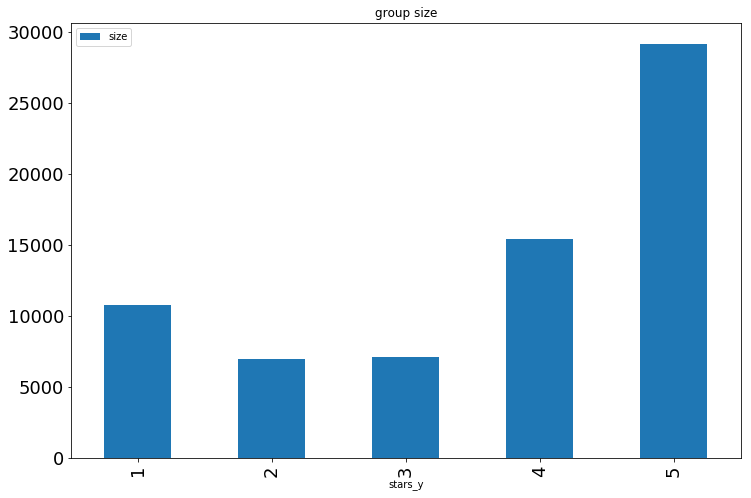

In [13]:
ax = starsgroup[['size']].plot(kind='bar', title ="group size", figsize=(12, 8), legend=True, fontsize=18)
plt.show()

<b> Boxplot of Stars and Polarity: </b>
<br></br>
Polarity classifies whether the expressed opinion is positive, negative, or neutral on a scale between -1 (negative) to 1 (positive). The median sentiment polarity appears to be trending positive as the star rating goes up from 1 to 5.  The spread is even and consistent. 

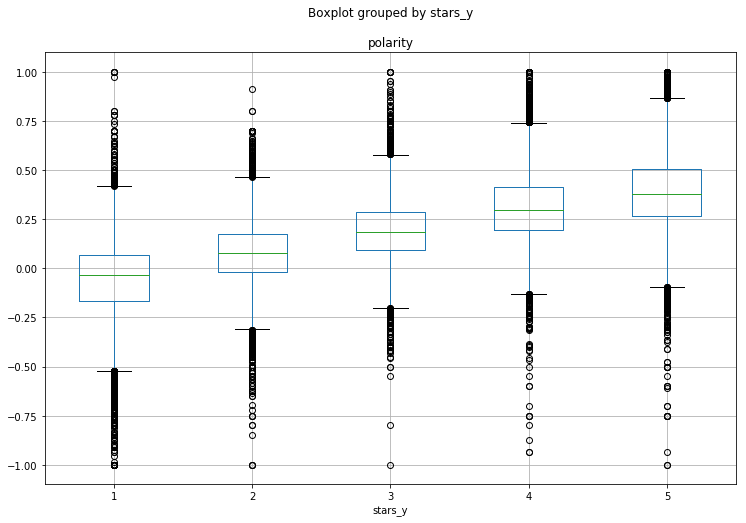

In [14]:
#boxplot polarity by star rating
bp1 = yelp_stars.boxplot('polarity', by='stars_y', figsize = (12, 8))

<b> Boxplot of Stars and Subjectivity: </b>
<br> </br>
Subjectivity classifies whether the expressed opinion is objective or subjective on a scale between -1 (very objective) to 1 (very subjective). The median sentiment subjectivity trends slightly subjective the higher the star rating, however not as steeply as the correlation between polarity and star rating.

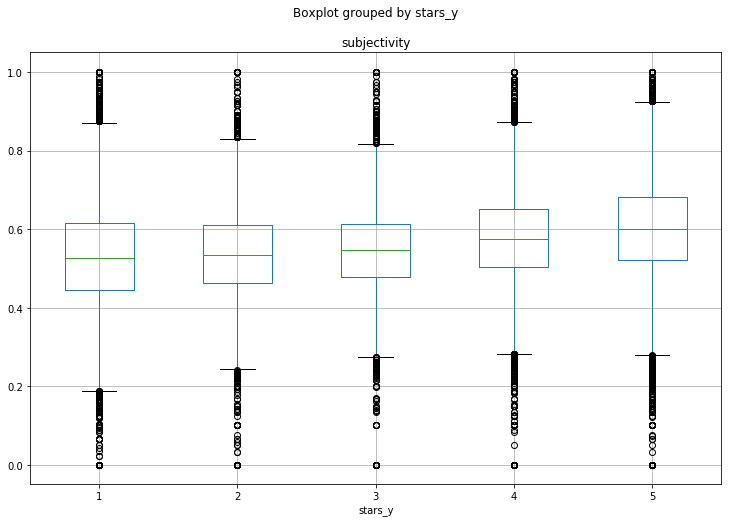

In [15]:
#boxplot subjectivity by star rating
bp2 = yelp_stars.boxplot('subjectivity', by='stars_y', figsize = (12, 8))

Now that we have explored our sentimental values, we have some insight for how to perform our analysis. We want to be able to compare stars and polarity in a meaningful manner. To do this we transformed the polarity scale to match the star scale, which is on a 5 point likert scale. Using a user defined called normalize_polarity and an apply function, we were able to create a new column for our 5 point scale. 

In [16]:
# Normalize polarity with Star Values

def normalize_polarity(x):
    if  .6 < x <= 1:
        return 5
    elif .2 < x <= .6:
        return 4
    elif -.2 <= x <= .2:
        return 3
    elif -.6 < x < -.2:
        return 2
    else:
        return 1

    
Yelp['polarity_normalized'] = Yelp['polarity'].apply(normalize_polarity)

Yelp

,Unnamed: 0,business_id,categories,city,name,postal_code,review_count,stars_x,state,_id,...,review_id,stars_y,text,useful,user_id,sentiment,polarity,subjectivity,polarity_category,polarity_normalized
0,0,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c518e,...,lM_XM7e1nD7d7NJ815inuA,4,Cozy neighborhood sports bar w good burgers. L...,2,UfUFjbwLpYCeJrWUWdMYVA,"(0.2833333333333334, 0.525)",0.283333,0.525000,Positive,4
1,1,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30c90d7c4d55f05c592c,...,ACW_G1G0PG0GNyGUPfI3UA,4,The bad: the bar closes at 10pm. It seems lik...,0,VWDL0VgQ2ivpN3oYhL_WsA,"(0.16313131313131313, 0.5383838383838384)",0.163131,0.538384,Neutral,3
2,2,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6dc2,...,KKJa4pRGwq8eO6YCdhjNoA,5,"Good food, good vibes, good service. All adds ...",1,SoL4ToJdvxWpGGzxYVA86A,"(0.4402777777777777, 0.5597222222222222)",0.440278,0.559722,Positive,4
3,3,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30ca0d7c4d55f05c6f0b,...,zSa_s88VlxYzeiHHTlK6xw,5,My wife and I were referred to this place by a...,0,JIj2V2YaM5_8jVtnkLSZ5g,"(0.6333333333333333, 0.5666666666666667)",0.633333,0.566667,Very Positive,5
4,4,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cd602,...,1wYTbfyQ0bfM31nM9c3hsA,3,My boyfriend likes burgers...I don't. Not real...,4,BoJQWDp2a9sxUMrlJBTfRA,"(0.13651875901875904, 0.4424745162245164)",0.136519,0.442475,Neutral,3
5,5,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cc0d7c4d55f05cf63f,...,ylh2-hOBdV7uzdinX3pbfw,5,Border Burger is great. Onion rings are awesom...,0,0CuIwjdRrcOsUrO-2gE-9A,"(0.77125, 0.7575000000000001)",0.771250,0.757500,Very Positive,5
6,6,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d03ed,...,_yf_sxbOp63YVc9Mdys_cw,1,Unimpressed. The place was pretty run down. T...,0,7BKHMOG-E0fW2VGWajLAjA,"(0.06349206349206347, 0.7555555555555555)",0.063492,0.755556,Neutral,3
7,7,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d1621,...,_QF1GZE6f9-eWb2GGtcgUw,4,Great flame broiled burgers. Used to be my fa...,0,FrLvmygqsfjtHGRx4-poaA,"(0.5333333333333333, 0.6166666666666667)",0.533333,0.616667,Positive,4
8,8,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d281c,...,A98EBKgfyxrsnjzosbXM2A,3,I had a Garden Burger and fries. It was prett...,0,3rAF4TU6nIjBztE7Pq2lPg,"(0.5166666666666666, 0.8000000000000002)",0.516667,0.800000,Positive,4
9,9,_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,Original Hamburger Works,85007,277,4.0,AZ,5bfb30cd0d7c4d55f05d2979,...,XDCl4tqaQMJrJ0z07bU_Qg,4,Came here for the first time with my 19-year o...,1,RkEd2r0YcEVSsaiO-ZD-OQ,"(0.07222222222222222, 0.21481481481481485)",0.072222,0.214815,Neutral,3


<b> Yelp Restaurant Sentiment Analysis and Postcode Data: </b>
<br></br>
We then take a smaller dataset subset of our data to examine regional differences in sentiment. 

In [17]:
# Subset Columns to compare customer review stars and the polarity
yelpSelectedColumns = Yelp[['postal_code', 'name', 'stars_y', 'polarity_normalized']]
yelpStarCompare = yelpSelectedColumns.groupby(['postal_code', 'name']).mean()

In [18]:
#finds the difference between the average star values and the polarity
def sentiment_delta(x):
    stars_y = x['stars_y']
    polarity_normalized = x['polarity_normalized']
    error_estimate = stars_y - polarity_normalized
    return error_estimate

# Apply this function to whole data frame
yelpStarCompare['star_delta'] = yelpStarCompare.apply(sentiment_delta, axis=1)

yelpStarCompare

stars_y  \
postal_code name                                                  
6502        Altes Bootshaus                            4.000000   
            Athos                                      4.333333   
            Berghotel Rosstrappe                       1.000000   
            Eisvilla                                   5.000000   
            GaststÃ¤tte KÃ¶nigsruhe                    1.000000   
            Restaurant Forelle                         4.000000   
6632        CafÃ© Merle                                3.000000   
            MÃ¼hle                                     3.500000   
            Restaurant am Unstrut- Wehr Donath Stefan  1.000000   
6917        Restaurant zur Alten Brauerei              1.000000   
            Restaurante Pizzeria                       5.000000   
11290       Auberge du Dominicain                      4.000000   
12923       Filion's Diner                             4.500000   
15003       Ambridge Italian Villa                     1.000000   
            Bridgetown Taphouse                        5.000000   
            Frank's Pizzeria                           2.500000   
            K & N Restaurant                           5.000000   
            Nelia's Smokehouse                         4.000000   
            ODBQ                                       1.000000   
            Pizza House                                5.000000   
15017       Bee'z Bistro & Pub                         4.000000   
            Bob Evans                                  2.000000   
            Bubba's Gourmet Burghers and Beer          4.750000   
            Burgh's Pizza & Wing Pub                   3.000000   
            Country Style Pizza                        5.000000   
            Cucina Bella                               3.000000   
            El Paso Mexican Grill                      5.000000   
            First Watch                                5.000000   
            Labella Bean                               4.000000   
            Mac & Toz Alehouse                         2.500000   
...                                                         ...   
89183       Thai House                                 4.200000   
            Tokyo Peking Asian Restaurant              4.000000   
            Trattoria Italia                           4.500000   
            Village Pub & Poker                        4.000000   
            Windy City Beefs N Pizza                   4.111111   
            Wings Restaurants                          4.250000   
            Yanni's Gyros                              4.666667   
            Yum Yum BBQ                                3.500000   
            Yummy Grill & Sushi                        2.000000   
            Zenshin Asian Restaurant                   3.833333   
89199       Johnny Smalls                              3.666667   
89502       Little Caesars Pizza                       1.000000   
93013       Carl's Jr.                                 1.000000   
93462       Aldersbacher BrÃ¤ustÃ¼berl                 3.000000   
            EinÃ¶dhof Waldeck                          5.000000   
            GaststÃ¤tte Zum Dimpfelstadl               4.000000   
            Kur und Ferienhotel Bayerwald              5.000000   
94405       Pizzeria Il Camino                         5.000000   
94568       Wirtshaus am Goldenen Steig                4.000000   
97491       Halfway Cafe                               4.000000   
97535       Angelo's Pizza                             2.000000   
            Esaan Cafe                                 5.000000   
            Golden Phoenix Chinese Restaurant          5.000000   
            Iron Skillet                               2.000000   
            La Tapatia Restaurant                      5.000000   
            Los Tres Potrillos                         5.000000   
            My Deli & Sushi                            4.000000   
            Roscoe's BBQ            

The average delta between stars and normalized polarity was .761, indicated that on average the sentiment analysis was in within one star of the true customer rating. Our average overestimate was 1.056 and our underestimate 0.799, meaning sentiment analysis was more likely to skew positive when compared to star ratings. 

In [19]:
# Estimates average delta value
avgOverEstimate = yelpStarCompare[yelpStarCompare['star_delta'] < 0].mean()
avgOverEstimate['star_delta']

-1.0563112352939656

In [20]:
# The average over estimate of the sentiment analysis compared to the star rating
avgOverEstimate = yelpStarCompare[yelpStarCompare['star_delta'] < 0].mean()

avgOverEstimate['star_delta']

-1.0563112352939656

In [21]:
# the average under estimate of the sentiment analysis compared to the star rating
avgUnderEstimate = yelpStarCompare[yelpStarCompare['star_delta'] > 0].mean()
avgUnderEstimate['star_delta']

0.7999995117784094

In [22]:
#create new df to look at the absolute value of star_delta
yelpStarCompareAbs = yelpStarCompare

yelpStarCompareAbs['star_delta'] = abs(yelpStarCompareAbs['star_delta'])

Almost all the most congruent star and polarity come from zipcode 61820. This postal code belongs to Champaign County, Illinois. 

In [23]:
# Which Zipcodes had the most accurate sentimental analysis compared with star rating
yelpSortedByDeltaAsc = yelpStarCompareAbs.sort_values(by=['star_delta'])
topZipCodesAccurate = yelpSortedByDeltaAsc[:10]
topZipCodesAccurate

stars_y  polarity_normalized  \
postal_code name                                                        
6502        Altes Bootshaus             4.000000             4.000000   
61820       Szechuan China              1.000000             1.000000   
            Spoon House Korean Kitchen  3.000000             3.000000   
            Spicy Tang                  3.000000             3.000000   
            South China Restaurant      3.666667             3.666667   
            Sakanaya                    3.600000             3.600000   
            Pizzeria Antica             3.333333             3.333333   
            Pizza Hut                   3.000000             3.000000   
            Wingstop                    3.000000             3.000000   
            Papa Del's Pizza            3.222222             3.222222   

                                        star_delta  
postal_code name                                    
6502        Altes Bootshaus                    0.0  
61820       Szechuan China                     0.0  
            Spoon House Korean Kitchen         0.0  
            Spicy Tang                         0.0  
            South China Restaurant             0.0  
            Sakanaya                           0.0  
            Pizzeria Antica                    0.0  
            Pizza Hut                          0.0  
            Wingstop                           0.0  
            Papa Del's Pizza                   0.0

The least congruent stars and polarity have more variety but most originate near Las Vegas, NV and Scottsdale, AZ. 

In [24]:
# Which Zipcodes had the most least accurate sentimental analysis compared with star rating
yelpSortedByDeltaDesc = yelpStarCompareAbs.sort_values(by=['star_delta'], ascending=False)
topZipCodesError = yelpSortedByDeltaDesc[:10]
topZipCodesError

,,stars_y,polarity_normalized,star_delta
postal_code,name,,,
89119,Crispy Town,1.0,5.0,4.0
47250,The Downtowner,5.0,1.0,4.0
85251,Wendy's,5.0,1.0,4.0
44070,Red Lobster,1.0,5.0,4.0
85375,Dairy Queen,1.0,5.0,4.0
85374,McDonald's,1.0,4.0,3.0
89118,Meat Chix & Wieners,1.0,4.0,3.0
89148,Tropical Smoothie Cafe,1.0,4.0,3.0
15236,Eat'n Park Restaurant,4.0,1.0,3.0


Does the sentiment analysis by textblob tend to favor a midwestern accent or do midwesterns more accurately write reviews that reflect their star rating? Is the way we transformed our data not capturing the true results within the data? More analysis on these questions is needed.

<b> Anova Comparing Stars and Polarity: </b>
<br></br>
Another analysis we conducted is one way ANOVA, which compares the means between the groups and whether or not any of those means are statistically significantly different from eachother. One way ANOVA was the methodology chosen because we have one categorical independent variable (star rating) and one continuous variable (polarity).
<br></br>
The null hypothesis for one way ANOVA:
Ho = 𝝁1 = 𝝁2 = 𝝁3 = 𝝁4 = 𝝁5
 
   If one way ANOVA shows there is a statistically significant result (P < Alpha 0.05) then we reject the Null and accept the Alternative, meaning that there are at least 2 group means that are significantly different from each other.

We conducted one way ANOVA on the polarity values for each star rating group:


In [25]:
#categorical vs numerical variables - one way ANOVA
#relationship between star rating and polarity
groups = pd.unique(yelp_stars.stars_y.values)
d_data = {grp:yelp_stars['polarity'][yelp_stars.stars_y == grp] for grp in groups}

#number of conditions
k = len(pd.unique(yelp_stars.stars_y))
#conditions times participants
N = len(yelp_stars.values)
#participants in each condition
n = yelp_stars.groupby('stars_y').size()

One way ANOVA tests for a difference in outcome between two or more levels of a single independent variable. For our ANOVA, we are testing if there is a difference in polarity between different star rating groups.

In [26]:
#degrees of freedom
dfbetween = k - 1
dfwithin = N - k
dftotal = N - 1

In [27]:
#sum of squares between
#variability due to interaction between the groups (sum of sq of the model)
ssbetween = yelp_stars.groupby('stars_y').sum()['polarity']**2/n - (yelp_stars['polarity'].sum()**2)/N

#sum of squares within
#variability in the data due to differences within people
sum_y_sq = sum([value**2 for value in yelp_stars['polarity'].values])
sswithin = sum_y_sq - sum(yelp_stars.groupby('stars_y').sum()['polarity']**2)/n

#sum of squares total
#total variability in the data
sstotal = sum_y_sq - (yelp_stars['polarity'].sum()**2)/N

In [28]:
#mean square between
msbetween = ssbetween / dfbetween

#mean square within
mswithin = sswithin / dfwithin

In [29]:
#F-VALUE

F = msbetween / mswithin

If F-value is > the critical value, we reject the null hypothesis.

null h for anova = the mean is the same for all groups

alt h for anova = the mean is not the same for all groups

In [30]:
#P-VALUE
P = stats.f.sf(F, dfbetween, dfwithin)
print(P)

[0. 0. 0. 0. 0.]


If P < 0.05, reject the null.

0 < 0.05

We reject the null and accept that the mean is not the same for all groups - there is a statistically significant difference in polarity between the different star ratings.

In [31]:
model = ols('polarity ~ stars_y', data = yelp_stars).fit()

In [32]:
anova = sm.stats.anova_lm(model, typ=2)

In [33]:
print(anova)

               sum_sq       df             F  PR(>F)
stars_y   1937.368282      1.0  52746.814126     0.0
Residual  2550.061218  69428.0           NaN     NaN


Showing P value of 0, this is less than our alpha 0.05. We can conclude that there are at least 2 group means that are statistically different from each other. However, one way ANOVA is limited in where it cannot tell us which groups are the ones that are different from eachother. For this, additional analysis must be conducted. 

<b>Further Areas for Research:</b>
<br></br>
Throughout this process, we found more and more that would have liked to have included with this analysis.
<br></br>
In the future, we would like to explore:
- categories with sentiment
- other methods for normalization
- examine more regions and reviews to see if dialect plays a role in the sentiment analysis
- perform a MANOVA to gain more insight between star groups and polarity

